In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('.//Team Frames//avalanche.csv')
other_csvs = ['.//Team Frames//blackhawks.csv', './/Team Frames//bluejackets.csv', './/Team Frames//blues.csv', './/Team Frames//bruins.csv', './/Team Frames//canadiens.csv',
'.//Team Frames//canucks.csv', './/Team Frames//capitals.csv', './/Team Frames//coyotes.csv', './/Team Frames//devils.csv', './/Team Frames//ducks.csv',
'.//Team Frames//flames.csv', './/Team Frames//flyers.csv', './/Team Frames//goldenknights.csv', './/Team Frames//hurricanes.csv', './/Team Frames//islanders.csv',
'.//Team Frames//jets.csv', './/Team Frames//kings.csv', './/Team Frames//kraken.csv', './/Team Frames//leafs.csv', './/Team Frames//lightning.csv',
'.//Team Frames//oilers.csv', './/Team Frames//panthers.csv', './/Team Frames//penguins.csv', './/Team Frames//predators.csv', './/Team Frames//rangers.csv',
'.//Team Frames//redwings.csv', './/Team Frames//sabres.csv', './/Team Frames//senators.csv', './/Team Frames//sharks.csv', './/Team Frames//stars.csv',
'.//Team Frames//thrashers.csv', './/Team Frames//wild.csv']

for csv in other_csvs:
    temp = pd.read_csv(csv)
    df = pd.concat([df, temp])


df.dropna(inplace=True)
df.reset_index(inplace=True)
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x[0:10], format='%Y/%m/%d'))
df.drop(columns=['points', 'goals_against', 'power_play', 'penalty_kill', 'shots', 'shots_against', 'FOWp', 'index'], inplace=True)
df.tail()

,team,date,goals,opponent,identifier,rolling_points_5,rolling_points_10,rolling_points_20,rolling_goals_5,rolling_goals_10,rolling_ga_5,rolling_ga_10,rolling_pp_5,rolling_pk_5,rolling_shots_5,rolling_sa_5,rolling_fow_5,rolling_ga_sum,rolling_sa_sum,rolling_svp_5
36243,Minnesota Wild,2022-04-22,6,Seattle Kraken,vs,1.666667,1.52,1.35,3.866667,3.68,2.666667,2.84,22.440000,78.120000,31.266667,31.466667,48.506667,40.0,472.0,0.915254
36244,Minnesota Wild,2022-04-24,5,Nashville Predators,@,1.666667,1.60,1.35,4.066667,3.76,2.733333,2.76,23.106667,74.786667,31.066667,31.666667,48.720000,41.0,475.0,0.913684
36245,Minnesota Wild,2022-04-26,3,Arizona Coyotes,vs,1.666667,1.68,1.35,4.200000,3.84,2.866667,2.68,21.680000,74.340000,32.266667,30.533333,49.193333,43.0,458.0,0.906114
36246,Minnesota Wild,2022-04-28,3,Calgary Flames,vs,1.533333,1.60,1.30,4.133333,3.76,3.133333,2.80,19.460000,74.340000,32.333333,30.066667,48.273333,47.0,451.0,0.895787
36247,Minnesota Wild,2022-04-29,4,Colorado Avalanche,vs,1.600000,1.60,1.30,4.133333,3.68,3.000000,2.68,24.460000,75.673333,31.933333,29.666667,49.040000,45.0,445.0,0.898876


In [3]:
df.rolling_points_5 = df.rolling_points_5 / 2
df.rolling_points_10 = df.rolling_points_10 / 2
df.rolling_points_20 = df.rolling_points_20 / 2
df.rolling_pp_5 = df.rolling_pp_5 / 100
df.rolling_pk_5 = df.rolling_pk_5 / 100
df.rolling_fow_5 = df.rolling_fow_5 / 100

In [4]:
df_home = df[df['identifier'] == 'vs']
df_home.drop(columns=['identifier'], inplace=True)
df_away = df[df['identifier'] == '@']
df_away.drop(columns=['identifier'], inplace=True)

merged_df = pd.merge(df_home, df_away, how='left', left_on=['date', 'opponent'], right_on=['date', 'team'])
merged_df.drop(columns=['opponent_x', 'opponent_y'], inplace=True)
merged_df.head(10)

c:\Users\cbarg\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,team_x,date,goals_x,rolling_points_5_x,rolling_points_10_x,rolling_points_20_x,rolling_goals_5_x,rolling_goals_10_x,rolling_ga_5_x,rolling_ga_10_x,...,rolling_ga_5_y,rolling_ga_10_y,rolling_pp_5_y,rolling_pk_5_y,rolling_shots_5_y,rolling_sa_5_y,rolling_fow_5_y,rolling_ga_sum_y,rolling_sa_sum_y,rolling_svp_5_y
0,Colorado Avalanche,2006-01-03,3,0.400000,0.46,0.5375,3.333333,3.32,3.866667,3.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Colorado Avalanche,2006-01-07,2,0.533333,0.54,0.5625,3.400000,3.40,3.266667,3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Colorado Avalanche,2006-01-09,6,0.533333,0.54,0.5625,3.266667,3.36,3.333333,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado Avalanche,2006-01-11,2,0.533333,0.54,0.5875,3.466667,3.48,3.200000,3.20,...,3.600000,3.56,0.137933,0.771467,28.400000,33.600000,0.477733,54.0,504.0,0.892857
4,Colorado Avalanche,2006-01-17,5,0.666667,0.60,0.6250,3.533333,3.52,2.800000,3.12,...,3.000000,2.72,0.179000,0.799333,28.333333,30.000000,0.516533,45.0,450.0,0.900000
5,Colorado Avalanche,2006-01-21,3,0.666667,0.60,0.6250,3.600000,3.48,2.866667,3.12,...,2.733333,2.76,0.218800,0.840267,35.666667,26.333333,0.522800,41.0,395.0,0.896203
6,Colorado Avalanche,2006-01-24,7,0.666667,0.56,0.6000,3.666667,3.36,2.933333,3.20,...,2.666667,2.24,0.225867,0.857600,27.666667,29.466667,0.507867,40.0,442.0,0.909502
7,Colorado Avalanche,2006-01-26,2,0.666667,0.56,0.6000,3.866667,3.52,3.000000,3.28,...,2.600000,2.52,0.159533,0.807600,31.933333,22.533333,0.527333,39.0,338.0,0.884615
8,Colorado Avalanche,2006-01-28,3,0.700000,0.58,0.5875,3.800000,3.52,2.800000,3.16,...,2.866667,3.20,0.202533,0.796933,26.933333,31.400000,0.495333,43.0,471.0,0.908705
9,Colorado Avalanche,2006-01-31,3,0.666667,0.60,0.5750,3.533333,3.48,2.733333,3.04,...,2.933333,2.80,0.125800,0.852200,26.600000,27.800000,0.467933,44.0,417.0,0.894484


In [17]:
merged_df['rolling_points_10_div'] = merged_df.rolling_points_10_x - merged_df.rolling_points_10_y
merged_df['rolling_points_20_div'] = merged_df.rolling_points_20_x - merged_df.rolling_points_20_y
merged_df['rolling_goals_5_div'] = merged_df.rolling_goals_5_x - merged_df.rolling_goals_5_y
merged_df['rolling_goals_10_div'] = merged_df.rolling_goals_10_x - merged_df.rolling_goals_10_y
merged_df['rolling_ga_5_div'] = merged_df.rolling_ga_5_y - merged_df.rolling_ga_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_ga_10_div'] = merged_df.rolling_ga_10_y - merged_df.rolling_ga_10_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_pp_5_div'] = merged_df.rolling_pp_5_x - merged_df.rolling_pp_5_y
merged_df['rolling_pk_5_div'] = merged_df.rolling_pk_5_x - merged_df.rolling_pk_5_y
merged_df['rolling_shots_5_div'] = merged_df.rolling_shots_5_x - merged_df.rolling_shots_5_y
merged_df['rolling_sa_5_div'] = merged_df.rolling_sa_5_y - merged_df.rolling_sa_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_fow_5_div'] = merged_df.rolling_fow_5_x - merged_df.rolling_fow_5_y
merged_df['rolling_svp_5_div'] = merged_df.rolling_svp_5_x - merged_df.rolling_svp_5_y
merged_df['result'] = np.where(merged_df.goals_x > merged_df.goals_y, 1, 0)

merged_df.dropna(inplace=True)
merged_df['result'].sum()

8249

In [6]:
merged_df[['rolling_points_10_div','rolling_points_20_div', 'rolling_goals_5_div', 'rolling_goals_10_div', 'rolling_svp_5_x', 'rolling_svp_5_y',  
'rolling_ga_5_div', 'rolling_ga_10_div', 'rolling_pk_5_div', 'rolling_shots_5_div', 'rolling_sa_5_div', 'rolling_fow_5_div', 'rolling_svp_5_div']].describe()

,rolling_points_10_div,rolling_points_20_div,rolling_goals_5_div,rolling_goals_10_div,rolling_svp_5_x,rolling_svp_5_y,rolling_ga_5_div,rolling_ga_10_div,rolling_pk_5_div,rolling_shots_5_div,rolling_sa_5_div,rolling_fow_5_div,rolling_svp_5_div
count,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000,16843.000000
mean,-0.001861,-0.000345,-0.004160,-0.006417,0.907049,0.907123,-0.006151,-0.006790,-0.000277,-0.042815,-0.041600,-0.000552,-0.000074
std,0.169018,0.147562,0.695557,0.584339,0.016041,0.016107,0.697412,0.586127,0.089460,3.574912,3.675902,0.038504,0.022390
min,-0.600000,-0.537500,-3.000000,-2.400000,0.830287,0.825065,-2.733333,-2.320000,-0.370600,-14.600000,-14.266667,-0.147267,-0.093203
25%,-0.120000,-0.100000,-0.466667,-0.400000,0.896406,0.896296,-0.466667,-0.400000,-0.059800,-2.400000,-2.533333,-0.026200,-0.015185
50%,0.000000,0.000000,0.000000,0.000000,0.907801,0.907781,0.000000,0.000000,-0.001067,0.000000,-0.066667,-0.000600,-0.000309
75%,0.120000,0.100000,0.466667,0.400000,0.918367,0.918465,0.466667,0.400000,0.058933,2.266667,2.400000,0.025200,0.015112
max,0.580000,0.525000,2.533333,2.320000,0.957774,0.956767,2.600000,2.320000,0.357800,13.933333,13.666667,0.138933,0.091240


# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['rolling_points_20_div', 'rolling_goals_5_div', 'rolling_goals_10_div', 'rolling_svp_5_div',  
'rolling_ga_5_div', 'rolling_ga_10_div', 'rolling_pk_5_div', 'rolling_shots_5_div', 'rolling_sa_5_div', 'rolling_fow_5_div']
X = merged_df[feature_cols]
y = merged_df.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

logreg = LogisticRegression()

try:
    logreg.fit(X_train, y_train)
except ValueError:
    mask = logreg.fit(X_train, y_train).isna()
    L = df.loc[mask, 'penalty_kill'].tolist()
    print("Not converted values are: " + ", ".join(L))
y_pred = logreg.predict(X_test)

In [8]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1575, 1031],
       [1128, 1319]], dtype=int64)

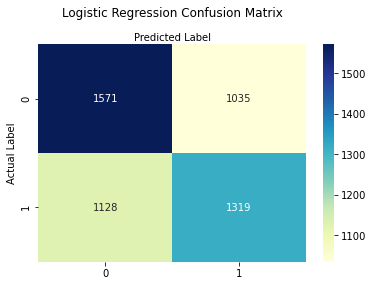

In [19]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
#plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('nhl_logistic_reg.png')

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5727290718385117
Precision: 0.5612765957446808
Recall: 0.5390273804658766


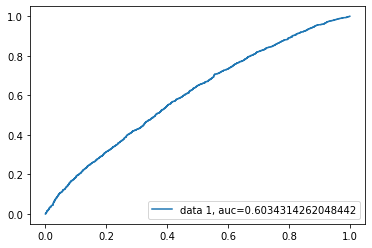

In [11]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

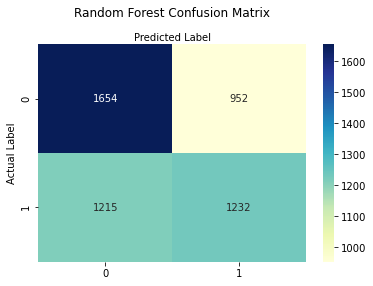

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
#plt.tight_layout()
plt.title('Random Forest Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('nhl_random_forest.png')

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5711458539481497
Precision: 0.5641025641025641
Recall: 0.503473641193298


# SVM

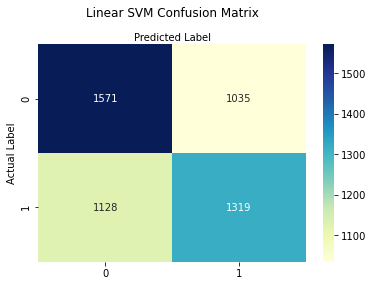

In [21]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
#plt.tight_layout()
plt.title('Linear SVM Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('nhl_linear_svm.png')

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5719374628933307
Precision: 0.5603228547153781
Recall: 0.5390273804658766
